Output 

Loading model...


Model loaded successfully!


Enter full path of MRI image  "C:\Users\sayal\Downloads\MRI Scan Brain Tumor - Kaggle\Training\pituitary\Tr-pi_1439.jpg"


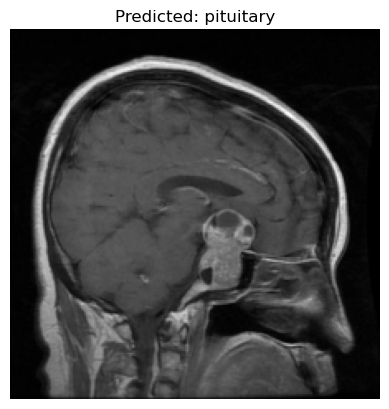

 Predicted Tumor Type: pituitary


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load model once
print("Loading model...")
model = load_model("brain_tumor_cnn_model1.h5")
print("Model loaded successfully!")

# Class labels
class_labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Prediction function
def predict_mri_image(image_path):
    IMG_SIZE = 224

    # Load image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Check if image is loaded properly
    if img is None:
        print("Error: Image not found or path is invalid.")
        return

    # Preprocessing
    img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img_eq = cv2.equalizeHist(img_resized)
    img_norm = img_eq / 255.0
    img_input = img_norm.reshape(1, IMG_SIZE, IMG_SIZE, 1)

    # Predict
    prediction = model.predict(img_input, verbose=0)
    predicted_label = class_labels[np.argmax(prediction)]

    # Display result
    plt.imshow(img_resized, cmap='gray')
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

    print(f" Predicted Tumor Type: {predicted_label}")

# Get image path from user
image_path = input("Enter full path of MRI image ").strip('"')
if image_path:
    predict_mri_image(image_path)
else:
    print("No image path provided.")


C:\Users\sayal\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 137s 903ms/step - accuracy: 0.6266 - loss: 0.9723 - val_accuracy: 0.8644 - val_loss: 0.3802
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 141s 986ms/step - accuracy: 0.8713 - loss: 0.3795 - val_accuracy: 0.9108 - val_loss: 0.2620
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 125s 873ms/step - accuracy: 0.9042 - loss: 0.2714 - val_accuracy: 0.9125 - val_loss: 0.2629
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 126s 881ms/step - accuracy: 0.9408 - loss: 0.1843 - val_accuracy: 0.9309 - val_loss: 0.1958
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 129s 903ms/step - accuracy: 0.9447 - loss: 0.1587 - val_accuracy: 0.9265 - val_loss: 0.2378
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 128s 892ms/step - accuracy: 0.9603 - loss: 0.1242 - val_accuracy: 0.9344 - val_loss: 0.1937
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 129s 903ms/step - accuracy: 0.9680 - loss: 0.0870 - val_accuracy: 0.9318 - val_loss: 0.2608
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 126s 883ms/step - accuracy: 0.9691 -

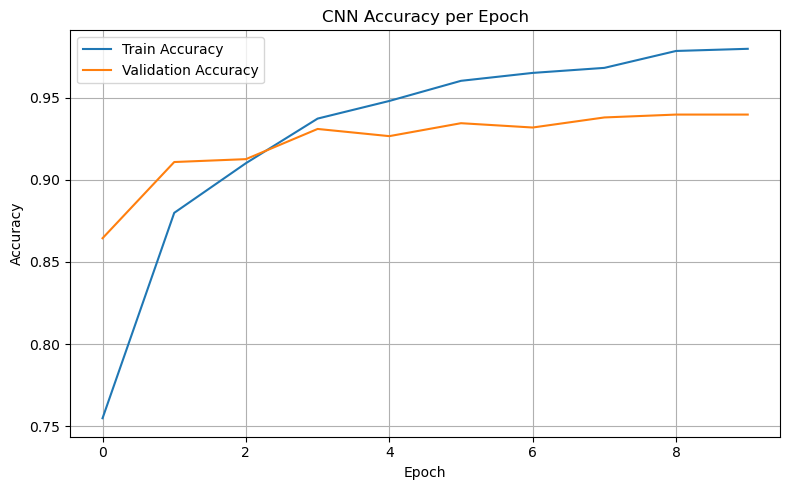

36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 179ms/step


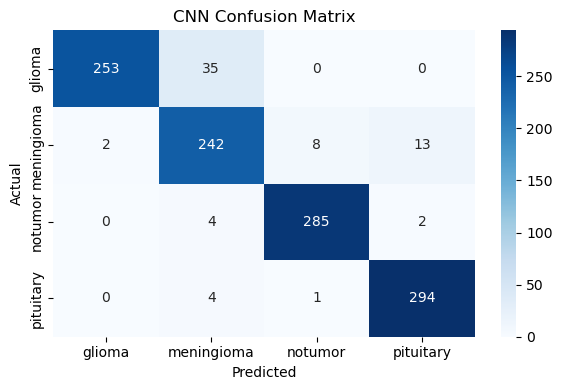

Classification Report:

              precision    recall  f1-score   support

      glioma       0.99      0.88      0.93       288
  meningioma       0.85      0.91      0.88       265
     notumor       0.97      0.98      0.97       291
   pituitary       0.95      0.98      0.97       299

    accuracy                           0.94      1143
   macro avg       0.94      0.94      0.94      1143
weighted avg       0.94      0.94      0.94      1143



In [15]:
# 📦 Required Libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import seaborn as sns

# 🧠 Dataset Settings
IMG_SIZE = 224
dataset_path = r'C:\Users\sayal\Downloads\MRI Scan Brain Tumor - Kaggle\Training'

# 🔄 Load and preprocess images
def load_images_from_folder(folder_path):
    images = []
    labels = []
    class_names = os.listdir(folder_path)
    for label in class_names:
        class_folder = os.path.join(folder_path, label)
        if not os.path.isdir(class_folder):
            continue
        for file in os.listdir(class_folder):
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                try:
                    img = cv2.imread(os.path.join(class_folder, file), cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                    img = cv2.equalizeHist(img)
                    img = img / 255.0
                    images.append(img)
                    labels.append(label)
                except Exception as e:
                    print(f"Error processing image {file}: {e}")
    return np.array(images), np.array(labels)

# ✅ Load the dataset
images, labels = load_images_from_folder(dataset_path)
images = images.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# 🔠 Encode labels
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)
labels_categorical = to_categorical(labels_encoded)

# ✂️ Train-test split
X_train, X_test, y_train, y_test = train_test_split(images, labels_categorical, test_size=0.2, random_state=42)

# 🏗️ Build CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(le.classes_), activation='softmax')
])

# 🛠️ Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# 🚀 Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# 📈 Plot Accuracy Curve
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 🧪 Evaluate on test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# 📊 Confusion Matrix with full integer display
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# 📝 Classification Report
print("Classification Report:\n")
print(classification_report(y_true_classes, y_pred_classes, target_names=le.classes_))

# 💾 Save model
model.save('brain_tumor_model.keras')  # Modern saving format



In [17]:
model.save("brain_tumor_model.keras", save_format="keras")

